In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:

dataset = pd.read_csv('GAN_Synthetic_dataset.csv')

In [3]:
dataset

,age,sex,chest_pain_type,resting_bp,serum_cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,smoking,diabetes,obesity,family_history,target
0,58.000000,1.000000,4.000000,150.000000,247.000000,0.000000,0.000000,148.000000,0.000000,2.127886,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0
1,52.000000,1.000000,3.000000,123.000000,266.000000,0.000000,1.000000,149.000000,0.000000,0.274316,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,59.000000,1.000000,3.000000,116.000000,153.000000,0.000000,0.000000,149.000000,0.000000,0.589638,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,67.000000,1.000000,2.000000,125.000000,274.000000,0.000000,1.000000,178.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1
4,51.000000,1.000000,2.000000,130.000000,169.000000,0.000000,0.000000,125.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8630,50.125308,0.022138,2.966283,157.026591,291.980011,0.068045,0.100177,158.039561,0.197060,1.103979,0.931813,1.834406,0.044514,-0.124178,0.011615,0.960336,0.157500,1
8631,47.135438,-0.128613,2.937105,131.217670,253.022692,0.999347,-0.032077,187.985239,1.236635,0.947384,1.238094,0.014092,0.966363,0.201464,-0.140410,0.002174,1.035130,1
8632,65.115824,0.093292,0.908143,118.995304,219.022087,-0.190575,1.028940,118.124655,0.915765,1.348427,2.990584,0.239416,-0.124724,-0.096748,-0.064668,-0.068115,1.084959,0
8633,48.063455,0.898959,1.041586,137.090217,263.028515,-0.020692,0.032703,161.001005,0.878716,2.290245,0.978147,0.099988,0.207437,0.089916,-0.034092,0.118210,-0.270139,0


In [4]:
# Handling missing values (imputing with the mean for numerical values)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset.iloc[:, :] = imputer.fit_transform(dataset)

In [5]:
# Removing duplicate rows
dataset.drop_duplicates(inplace=True)

In [6]:
dataset

,age,sex,chest_pain_type,resting_bp,serum_cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,smoking,diabetes,obesity,family_history,target
0,58.000000,1.000000,4.000000,150.000000,247.000000,0.000000,0.000000,148.000000,0.000000,2.127886,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0
1,52.000000,1.000000,3.000000,123.000000,266.000000,0.000000,1.000000,149.000000,0.000000,0.274316,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,59.000000,1.000000,3.000000,116.000000,153.000000,0.000000,0.000000,149.000000,0.000000,0.589638,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,67.000000,1.000000,2.000000,125.000000,274.000000,0.000000,1.000000,178.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1
4,51.000000,1.000000,2.000000,130.000000,169.000000,0.000000,0.000000,125.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8630,50.125308,0.022138,2.966283,157.026591,291.980011,0.068045,0.100177,158.039561,0.197060,1.103979,0.931813,1.834406,0.044514,-0.124178,0.011615,0.960336,0.157500,1
8631,47.135438,-0.128613,2.937105,131.217670,253.022692,0.999347,-0.032077,187.985239,1.236635,0.947384,1.238094,0.014092,0.966363,0.201464,-0.140410,0.002174,1.035130,1
8632,65.115824,0.093292,0.908143,118.995304,219.022087,-0.190575,1.028940,118.124655,0.915765,1.348427,2.990584,0.239416,-0.124724,-0.096748,-0.064668,-0.068115,1.084959,0
8633,48.063455,0.898959,1.041586,137.090217,263.028515,-0.020692,0.032703,161.001005,0.878716,2.290245,0.978147,0.099988,0.207437,0.089916,-0.034092,0.118210,-0.270139,0


In [7]:
# Splitting the features and target variable
X = dataset.drop('target', axis=1)
y = dataset['target']

In [8]:
# Encoding categorical data (if necessary)
# Let's assume 'sex', 'chest_pain_type', and 'thal' are categorical
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['chest_pain_type'] = label_encoder.fit_transform(X['chest_pain_type'])
X['thal'] = label_encoder.fit_transform(X['thal'])

In [9]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Initialize a dictionary to store model accuracies and confusion matrices
results_dict = {}

In [12]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
results_dict['Logistic Regression'] = {
    'accuracy': logistic_accuracy,
    'conf_matrix': confusion_matrix(y_test, y_pred_logistic),
    'classification_report': classification_report(y_test, y_pred_logistic)
}

In [13]:
# Support Vector Classifier (SVC)
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
results_dict['SVC'] = {
    'accuracy': svc_accuracy,
    'conf_matrix': confusion_matrix(y_test, y_pred_svc),
    'classification_report': classification_report(y_test, y_pred_svc)
}

In [14]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
results_dict['Decision Tree'] = {
    'accuracy': dt_accuracy,
    'conf_matrix': confusion_matrix(y_test, y_pred_dt),
    'classification_report': classification_report(y_test, y_pred_dt)
}

In [15]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
results_dict['Random Forest'] = {
    'accuracy': rf_accuracy,
    'conf_matrix': confusion_matrix(y_test, y_pred_rf),
    'classification_report': classification_report(y_test, y_pred_rf)
}

In [16]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
results_dict['Gradient Boosting'] = {
    'accuracy': gb_accuracy,
    'conf_matrix': confusion_matrix(y_test, y_pred_gb),
    'classification_report': classification_report(y_test, y_pred_gb)
}

In [17]:
# Display results
print("\nBaseline Accuracy of all algorithms:")
for model, result in results_dict.items():
    print(f"{model}: {result['accuracy'] * 100:.2f}%")
    print(f"Confusion Matrix for {model}:\n{result['conf_matrix']}")
    print(f"Classification Report for {model}:\n{result['classification_report']}")


Baseline Accuracy of all algorithms:
Logistic Regression: 68.67%
Confusion Matrix for Logistic Regression:
[[930 135]
 [406 256]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.87      0.77      1065
           1       0.65      0.39      0.49       662

    accuracy                           0.69      1727
   macro avg       0.68      0.63      0.63      1727
weighted avg       0.68      0.69      0.66      1727

SVC: 68.79%
Confusion Matrix for SVC:
[[939 126]
 [413 249]]
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.69      0.88      0.78      1065
           1       0.66      0.38      0.48       662

    accuracy                           0.69      1727
   macro avg       0.68      0.63      0.63      1727
weighted avg       0.68      0.69      0.66      1727

Decision Tree: 68.04%
Confusion Matrix for Decision Tree:
[[789 276]
 [276 3

In [18]:
# Hyperparameter Tuning to Improve Accuracy:

from sklearn.model_selection import GridSearchCV

In [19]:
# Logistic Regression - Hyperparameter tuning
param_grid_lr = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr_model = grid_search_lr.best_estimator_

In [20]:
# SVC - Hyperparameter tuning
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)
best_svc_model = grid_search_svc.best_estimator_

In [21]:
# Decision Tree - Hyperparameter tuning
param_grid_dt = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_

In [22]:
# Random Forest - Hyperparameter tuning
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

In [23]:
# Gradient Boosting - Hyperparameter tuning
param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 10]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_

In [24]:
# Assuming the tuned models are already obtained using GridSearchCV
best_lr_model = grid_search_lr.best_estimator_
best_svc_model = grid_search_svc.best_estimator_
best_dt_model = grid_search_dt.best_estimator_
best_rf_model = grid_search_rf.best_estimator_
best_gb_model = grid_search_gb.best_estimator_

In [25]:
# Create a dictionary of tuned models
models = {
    'Logistic Regression': best_lr_model,
    'SVC': best_svc_model,
    'Decision Tree': best_dt_model,
    'Random Forest': best_rf_model,
    'Gradient Boosting': best_gb_model
}


In [26]:
# Now evaluate the tuned models and store results
tuned_results_dict = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    tuned_results_dict[model_name] = {
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'classification_report': report
    }

In [27]:
print("\nAccuracy after Hyperparameter Tuning:")
for model, result in tuned_results_dict.items():
    print(f"{model}: {result['accuracy'] * 100:.2f}%")
    print(f"Confusion Matrix for {model}:\n{result['conf_matrix']}")
    print(f"Classification Report for {model}:\n{result['classification_report']}")



Accuracy after Hyperparameter Tuning:
Logistic Regression: 68.67%
Confusion Matrix for Logistic Regression:
[[930 135]
 [406 256]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.87      0.77      1065
           1       0.65      0.39      0.49       662

    accuracy                           0.69      1727
   macro avg       0.68      0.63      0.63      1727
weighted avg       0.68      0.69      0.66      1727

SVC: 74.58%
Confusion Matrix for SVC:
[[915 150]
 [289 373]]
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1065
           1       0.71      0.56      0.63       662

    accuracy                           0.75      1727
   macro avg       0.74      0.71      0.72      1727
weighted avg       0.74      0.75      0.74      1727

Decision Tree: 67.98%
Confusion Matrix for Decision Tree:
[[900 165]
 [388 

In [28]:
# Create a DataFrame for metrics before hyperparameter tuning
import pandas as pd

metrics_before_tuning = []

for model, result in results_dict.items():
    conf_matrix = result['conf_matrix']
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    metrics_before_tuning.append({
        'Model': model,
        'Accuracy': f"{result['accuracy'] * 100:.2f}%",
        'True Positives (TP)': TP,
        'True Negatives (TN)': TN,
        'False Positives (FP)': FP,
        'False Negatives (FN)': FN
    })

df_before_tuning = pd.DataFrame(metrics_before_tuning)
print("\nMetrics Before Hyperparameter Tuning:")
print(df_before_tuning)


Metrics Before Hyperparameter Tuning:
                 Model Accuracy  True Positives (TP)  True Negatives (TN)  \
0  Logistic Regression   68.67%                  256                  930   
1                  SVC   68.79%                  249                  939   
2        Decision Tree   68.04%                  386                  789   
3        Random Forest   74.58%                  319                  969   
4    Gradient Boosting   68.85%                  241                  948   

   False Positives (FP)  False Negatives (FN)  
0                   135                   406  
1                   126                   413  
2                   276                   276  
3                    96                   343  
4                   117                   421  


In [29]:
# Create a DataFrame for metrics after hyperparameter tuning
metrics_after_tuning = []

for model, result in tuned_results_dict.items():
    conf_matrix = result['conf_matrix']
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    metrics_after_tuning.append({
        'Model': model,
        'Accuracy': f"{result['accuracy'] * 100:.2f}%",
        'True Positives (TP)': TP,
        'True Negatives (TN)': TN,
        'False Positives (FP)': FP,
        'False Negatives (FN)': FN
    })

df_after_tuning = pd.DataFrame(metrics_after_tuning)
print("\nMetrics After Hyperparameter Tuning:")
print(df_after_tuning)



Metrics After Hyperparameter Tuning:
                 Model Accuracy  True Positives (TP)  True Negatives (TN)  \
0  Logistic Regression   68.67%                  256                  930   
1                  SVC   74.58%                  373                  915   
2        Decision Tree   67.98%                  274                  900   
3        Random Forest   71.51%                  253                  982   
4    Gradient Boosting   77.71%                  387                  955   

   False Positives (FP)  False Negatives (FN)  
0                   135                   406  
1                   150                   289  
2                   165                   388  
3                    83                   409  
4                   110                   275  


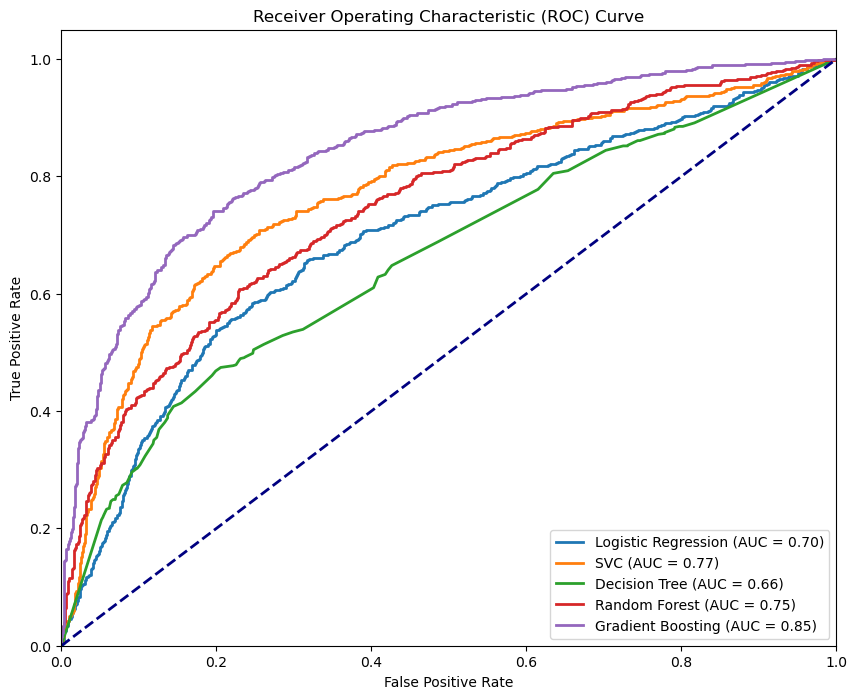

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

models = [best_lr_model, best_svc_model, best_dt_model, best_rf_model, best_gb_model]
model_names = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

plt.figure(figsize=(10, 8))

for i, model in enumerate(models):
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()